In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import json
import pickle
import mmcv
import utils
import numpy as np
import pandas as pd
import evaluation
import detection
import datasets
import visualization
#import matplotlib.pyplot as plt
#from mmdet.apis import inference_detector, show_result

In [2]:
load_type = "test"
cfg = './cm_rcnn_10164.py'
chp = '../work_dirs/cm_rcnn_10164_1/latest.pth'
output = '../detection/cm_rcnn_10164_1/eval_result.json'

In [3]:
dataset, concrete = datasets.load_dataset(cfg, load_type)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Preparing dataset ......
[Dataset is ready now !]


In [5]:
types = "segm"
thresh = [0.5, 0.75]

In [6]:
gt, gt_num, det, det_num, class_id = evaluation.voc_ap_prepare(dataset, image_ids=None, class_names=None,
                                                               limit=None, types=types, save=True)

Ready to formatting on *segm* ...
[Building voc style GTS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 220/220, 79.3 task/s, elapsed: 3s, ETA:     0s
voc groundtruth file building done!
Gt(gt numbers: [405])file saved done in ../detection/cm_rcnn_10164_1/segm_gts.pkl

[Building voc style DETS file......]
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 379/379, 1357.8 task/s, elapsed: 0s, ETA:     0s
voc detection file building done!
Det(det numbers: [379])file saved done in ../detection/cm_rcnn_10164_1/segm_dets.pkl


In [7]:
gt

[{0: {'region': [array([[False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           ...,
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False]])], 'det': [False]},
  1: {'region': [array([[False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           ...,
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False]]),
    array([[False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           [False, False, False, ..., False, False, False],
           ...,
    

In [8]:
det[0]["region"]

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [9]:
det[0]["region"][0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [10]:
targets = utils.voc_ap_compute(dataset, class_id, gt, det, load=False,
                               class_names=None, types=types, threshold=thresh)

Ready to evaluate on *segm* ...

TP: [[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
   15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
   29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
   43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
   57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
   71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
   85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
   99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
  113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
  127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
  141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
  155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
  169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
  183. 184. 185. 186. 187. 

(2, 381) <class 'numpy.ndarray'>
(2, 381) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>
(2, 381) <class 'numpy.ndarray'>
(2, 381) <class 'numpy.ndarray'>
(2,) <class 'numpy.ndarray'>

Multiple pr lines


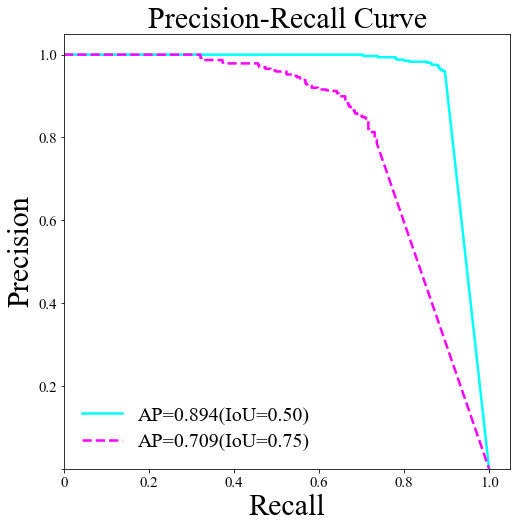


Multiple roc lines


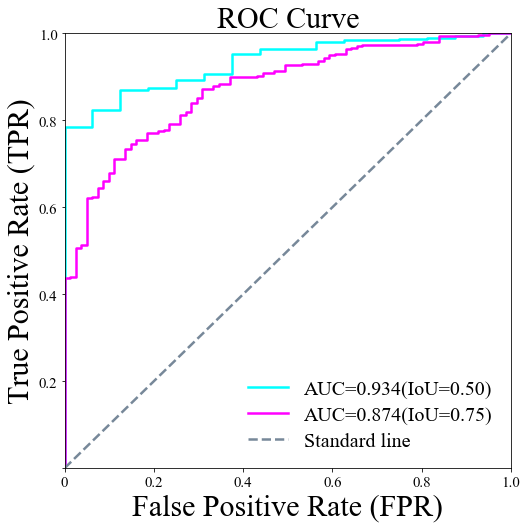

In [11]:
visualization.plot_voc_curve(targets, "bughole", thresh, save=False)

In [2]:
import numpy as np
np.arange(3, 6)

array([3, 4, 5])